PROYECTO FINAL MLOps

In [3]:
import ast
import pandas as pd

In [4]:
rows = [] #lista vacía para almacenar los datos que se van a leer del archivo JSON.
with open("steam_games.json") as f:  #se abre el archivo en modo lectura
    for line in f.readlines():    #lee el archivo línea por línea
        rows.append(ast.literal_eval(line)) #la función evalúa el contenido de la línea como una expresión Python válida y devuelve su valor. En este caso, se asume que cada línea contiene un diccionario en formato de cadena JSON válida.
                                            #después de que el bucle se completa, "rows" contendrá una lista de diccionarios, donde cada diccionario representa los datos de un juego de Steam.
df = pd.DataFrame(rows)  #se crea un DF de pandas a partir de la lista de diccionarios "rows". Cada diccionario en "rows" se convierte en una fila del DataFrame, y las claves del diccionario se convierten en las columnas del DataFrame.

In [5]:
#Chequeo la información del DF:
df.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


In [6]:
#Observo cuántos valores nulos hay en cada columna:
df.isna().sum()

publisher          8052
genres             3283
app_name              2
title              2050
url                   0
release_date       2067
tags                163
discount_price    31910
reviews_url           2
specs               670
price              1377
early_access          0
id                    2
developer          3299
sentiment          7182
metascore         29458
dtype: int64

In [7]:
#Borro las columnas que creo que son irrelevantes para las funciones que nos piden:
columnas_a_eliminar = ["url", "reviews_url", "title"]

In [8]:
#Elimino las columnas
df = df.drop(columnas_a_eliminar, axis=1)

In [9]:
df.head(2)

,publisher,genres,app_name,release_date,tags,discount_price,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN


In [10]:
#Filtrar las filas donde app_name es NaN (valor faltante)
juegos_sin_nombre = df.loc[df['app_name'].isnull(), ['publisher', 'genres']]

# Mostrar el resultado
print(juegos_sin_nombre)

     publisher           genres
74         NaN              NaN
2580       NaN  [Action, Indie]


In [11]:
#Cuando en "app_name" aparecen nulos los cambio por "No Disponible"
df['app_name'].fillna('No Disponible', inplace=True)
#Compruebo que el cambio se hizo bien
df["app_name"].iloc[74]

'No Disponible'

In [12]:
# Convertir la columna 'release_date' a formato de fecha con errores establecidos como NaT
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
# Creo una columna nueva en base a extraer el año de la columna "release_date"
df['release_year'] = df['release_date'].dt.year

In [13]:
# Quiero observar cómo está compuesta la columna "Metascore":
info_metascore = df['metascore'].describe()
# Mostrar la información
print(info_metascore)
# Obtiene los valores únicos que no son nulos de la columna "Metascore"
valores_metascore_no_nulos = df['metascore'].dropna().unique()
print(valores_metascore_no_nulos)

count     2677
unique      71
top         80
freq       125
Name: metascore, dtype: int64
[96 84 80 76 70 'NA' 69 81 75 72 66 67 77 91 89 83 61 88 65 94 57 86 87 92
 79 82 58 74 85 90 68 71 60 73 59 64 54 53 78 51 44 63 38 56 49 52 62 93
 48 34 95 43 55 24 46 41 20 39 45 35 47 40 36 50 32 37 33 42 27 29 30]


In [14]:
# Reemplazar 'NA' (u otros valores no numéricos) por NaN en la columna 'metascore'
df['metascore'].replace('NA', pd.NA, inplace=True)
# Rellenar los valores NaN con 0 en la columna 'metascore'
df['metascore'].fillna(0, inplace=True)
# Convertir la columna 'metascore' a formato entero (int)
df['metascore'] = df['metascore'].astype(int)

In [15]:
# Transformo los valores de la columna "price" en una nueva columna "precio" en el DF, 
# asignando el valor 0 a los valores que sean cadenas que comiencen con la letra "f": 
df['precio'] = df['price'].map(lambda x: 0 if str(x).startswith('f') else x)

In [16]:
df['precio'].unique()

array([4.99, 'Free To Play', 'Free to Play', 0.99, 2.99, 3.99, 9.99,
       18.99, 29.99, nan, 'Free', 10.99, 1.59, 14.99, 1.99, 59.99, 8.99,
       6.99, 7.99, 39.99, 19.99, 7.49, 12.99, 5.99, 2.49, 15.99, 1.25,
       24.99, 17.99, 61.99, 3.49, 11.99, 13.99, 'Free Demo',
       'Play for Free!', 34.99, 74.76, 1.49, 32.99, 99.99, 14.95, 69.99,
       16.99, 79.99, 49.99, 5.0, 44.99, 13.98, 29.96, 119.99, 109.99,
       149.99, 771.71, 'Install Now', 21.99, 89.99,
       'Play WARMACHINE: Tactics Demo', 0.98, 139.92, 4.29, 64.99,
       'Free Mod', 54.99, 74.99, 'Install Theme', 0.89, 'Third-party',
       0.5, 'Play Now', 299.99, 1.29, 3.0, 15.0, 5.49, 23.99, 49.0, 20.99,
       10.93, 1.39, 'Free HITMAN™ Holiday Pack', 36.99, 4.49, 2.0, 4.0,
       9.0, 234.99, 1.95, 1.5, 199.0, 189.0, 6.66, 27.99, 10.49, 129.99,
       179.0, 26.99, 399.99, 31.99, 399.0, 20.0, 40.0, 3.33, 199.99,
       22.99, 320.0, 38.85, 71.7, 59.95, 995.0, 27.49, 3.39, 6.0, 19.95,
       499.99, 16.06, 4.68, 131

In [17]:
# Reemplacé todos los valores string en la columna nueva "precio" por valores numéricos o nulos:
df["precio"].replace('Free To Play', 0, inplace = True)
df["precio"].replace('Free', 0, inplace = True)
df["precio"].replace('Free Demo', 0, inplace = True)
df["precio"].replace('Play for Free!', 0, inplace = True)
df["precio"].replace('Free Movie', "NaN", inplace = True)
df["precio"].replace('Install Now', "NaN", inplace = True)
df["precio"].replace('Play WARMACHINE: Tactics Demo', "NaN", inplace = True)
df["precio"].replace('Free to Use', 0, inplace = True)
df["precio"].replace('Play Now', 0, inplace = True)
df["precio"].replace('Free HITMAN™ Holiday Pack', 0, inplace = True)
df["precio"].replace('Free Mod', 0, inplace = True)
df["precio"].replace('Install Theme', "NaN", inplace = True)
df["precio"].replace('Third-party', "NaN", inplace = True)
df["precio"].replace('Play the Demo', "NaN", inplace = True)
df["precio"].replace('Starting at $499.00', 499, inplace = True)
df["precio"].replace('Starting at $449.00', 449, inplace = True)


In [18]:
# Observo qué categorías de análisis de sentimiento hay:
df['sentiment'].unique()

array([nan, 'Mostly Positive', 'Mixed', '1 user reviews',
       '3 user reviews', '8 user reviews', 'Very Positive',
       'Overwhelmingly Positive', '6 user reviews', '5 user reviews',
       '2 user reviews', 'Very Negative', 'Positive', 'Mostly Negative',
       '9 user reviews', 'Negative', '4 user reviews', '7 user reviews',
       'Overwhelmingly Negative'], dtype=object)

In [19]:
# df.to_csv('steam_csv', index=False)
# Creo un nuevo archivo csv con la limpieza de datos hecha anteriormente.


In [20]:
dframe = pd.read_csv("steam_csv")

1) def genero( Año: str ): Se ingresa un año y devuelve una lista con los 5 géneros más vendidos en el orden correspondiente.

In [21]:
# Definir la función para obtener los 5 géneros más vendidos para un año dado:
def genero(year):
    # Filtrar el DataFrame para obtener solo los datos del año proporcionado:
    df_anio = dframe[dframe['release_year'] == year]
    top_5_generos = df_anio['genres'].explode().value_counts().head(5).index.tolist()

    generos_mas_vendidos_dict = {
        'Año': year,
        'Top 5 Géneros': top_5_generos
    }
    
    return generos_mas_vendidos_dict

In [22]:
# Pruebo la función:
print(genero(2018))

{'Año': 2018, 'Top 5 Géneros': ["['Action', 'Adventure', 'Indie']", "['Free to Play', 'Indie', 'Simulation', 'Sports']", "['Casual', 'Indie']", "['Indie']", "['Action', 'Adventure', 'Indie', 'RPG']"]}


2) def juegos( Año: str ): Se ingresa un año y devuelve una lista con los juegos lanzados en el año.

In [23]:
# Defino la función para obtener un diccionario con los juegos lanzados en un año dado:
def juegos(year):
    # Filtro el DF para obtener solo los juegos lanzados en el año proporcionado:
    df_year = dframe[dframe['release_year'] == year]
    
    # Creo un diccionario con la información del año y los juegos lanzados:
    juegos_lanzados = {
        'Año': year,
        'Juegos': df_year['app_name'].tolist()
    }
    
    return juegos_lanzados

In [24]:
print(juegos(2009))

{'Año': 2009, 'Juegos': ['PRR Wagon Pack 01', 'Class 421 London South East "Jaffa Cake"', 'ATSF Wagon Pack 01', 'GP20 Union Pacific Add-on Livery', 'UK Van Wagon Pack', 'CSX SD70MAC Add-on Livery', 'CSX ES44AC Add-on Livery', 'Saints Row 2', "Mirror's Edge™", 'F.E.A.R. 2: Project Origin', 'Larva Mortus', 'Ceville', 'Empire: Total War™ - Special Forces Units & Bonus Content', 'Watchmen: The End is Nigh', 'Drakensang', 'Age of Booty™', 'Burnout Paradise: The Ultimate Box', 'Zombie Master', 'The Maw', 'The Maw: River Redirect', 'The Maw: Brute Force', 'Obulis', 'Space Giraffe', 'Codename: Panzers - Cold War', 'Escape Rosecliff Island', 'Puzzle Kingdoms', 'Samantha Swift and the Golden Touch', 'Two Worlds Epic Edition', 'Helldorado', 'X-Blades', 'Zeno Clash', 'The Maw: Speeder Lane', 'Virtual Families', 'Death Track®: Resurrection', 'Light of Altair', "Darkest Hour: Europe '44-'45", 'Prototype™', 'The Elder Scrolls IV: Oblivion® Game of the Year Edition Deluxe', 'Call of Juarez®: Bound in 

3) def specs( Año: str ): Se ingresa un año y devuelve una lista con los 5 specs que más se repiten en el mismo en el orden correspondiente.

In [25]:
def specs(year):
    df_anio = dframe[dframe['release_year'] == year]
    top_5_specs = df_anio['specs'].explode().value_counts().head(5).index.tolist()
    
    top5_specs_dict = {
        'Año': year,
        'Top 5 Specs': top_5_specs
    }
    
    return top5_specs_dict

In [26]:
print(specs(2009))

{'Año': 2009, 'Top 5 Specs': ["['Single-player']", "['Single-player', 'Downloadable Content', 'Steam Achievements', 'Full controller support', 'Steam Trading Cards', 'Steam Workshop', 'Steam Cloud', 'Steam Leaderboards']", "['Single-player', 'Multi-player']", "['Captions available']", "['Single-player', 'Steam Achievements']"]}


4) def earlyacces( Año: str ): Cantidad de juegos lanzados en un año con early access.

In [27]:
def earlyacces(year):
    df_year = dframe[dframe['release_year'] == year]
    cantidad_juegos_early = df_year['early_access'].sum()

    early_access_dict = {
        'Año': year,
        'Cantidad de Juegos': cantidad_juegos_early
    }
    
    return early_access_dict


In [28]:
print(earlyacces(2018))

{'Año': 2018, 'Cantidad de Juegos': 21}


5) def sentiment( Año: str ) : Según el año de lanzamiento, se devuelve una lista con la cantidad de registros que se encuentran categorizados con un análisis de sentimiento.

    Ejemplo de retorno: {Mixto = 182, Muy Positivo = 120, Positivo = 278}

In [29]:
def sentiment(year):
    df_anio = dframe[dframe['release_year'] == year]
    
    # Calcular la cantidad de registros por cada categoría de sentimiento y obtener el diccionario resultante
    sentimiento_contador = df_anio['sentiment'].value_counts().to_dict()
    
    # Crear un diccionario con la información del año y la cantidad de registros por cada categoría de sentimiento
    sentimiento_dict = {
        'Año': year,
        'Categorías': sentimiento_contador
    }
    
    return sentimiento_dict

In [30]:
print(sentiment(2009))

{'Año': 2009, 'Categorías': {'Very Positive': 77, 'Mixed': 64, 'Mostly Positive': 48, 'Positive': 21, 'Mostly Negative': 18, '2 user reviews': 15, '1 user reviews': 14, '3 user reviews': 11, '6 user reviews': 8, 'Overwhelmingly Positive': 7, '5 user reviews': 6, '4 user reviews': 6, '9 user reviews': 4, '7 user reviews': 3, '8 user reviews': 2, 'Negative': 2}}


6) def metascore( Año: str ): Top 5 juegos según año con mayor metascore.

In [31]:
def metascore(year):
    # Filtrar el DataFrame para obtener solo los datos del año proporcionado
    df_anio = dframe[dframe['release_year'] == year]
    
    # Ordenar los datos por metascore de forma descendente (mayor a menor)
    df_anio_ordenado = df_anio.sort_values(by='metascore', ascending=False)
    
    # Seleccionar los primeros 5 registros (los 5 juegos con mayor metascore) y obtener los nombres de esos juegos
    top_5_juegos = df_anio_ordenado.head(5)['app_name'].tolist()
    
    # Crear un diccionario con la información del año y los top 5 juegos según el metascore
    metascore_dict = {
        'Año': year,
        'Top 5 Juegos Metascore': top_5_juegos
    }
    
    return metascore_dict

In [32]:
print(metascore(2009))

{'Año': 2009, 'Top 5 Juegos Metascore': ['The Elder Scrolls IV: Oblivion® Game of the Year Edition Deluxe', 'Fallout 3: Game of the Year Edition', 'Dragon Age: Origins', 'Street Fighter® IV', 'Empire: Total War™']}


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [39]:
dframe.describe()

,discount_price,id,metascore,release_year,precio
count,204.000000,2.978200e+04,29783.000000,29783.000000,27867.000000
mean,12.605392,4.429894e+05,6.170399,2014.759158,9.396330
std,18.207547,1.838853e+05,20.434558,3.508212,17.066125
min,0.490000,1.000000e+01,0.000000,1970.000000,0.000000
25%,0.890000,3.211412e+05,0.000000,2014.000000,2.990000
50%,4.090000,4.368550e+05,0.000000,2016.000000,4.990000
75%,22.660000,5.875075e+05,0.000000,2017.000000,9.990000
max,139.990000,2.028850e+06,96.000000,2021.000000,995.000000


Quiero observar cómo los géneros del juego están relacionados con su precio. Por ejemplo, si ciertos géneros tienden a tener precios más altos o más bajos.

In [34]:
dframe = dframe.dropna(subset=['release_year']).replace([np.inf, -np.inf], np.nan).dropna(subset=['release_year'])
dframe['release_year'] = dframe['release_year'].astype(int)
dframe['release_year'].info()

<class 'pandas.core.series.Series'>
Index: 29783 entries, 0 to 32133
Series name: release_year
Non-Null Count  Dtype
--------------  -----
29783 non-null  int32
dtypes: int32(1)
memory usage: 349.0 KB


Se genera un gráfico de barras que ilustra la distribución del número de juegos lanzados por año, lo que puede ayudar a visualizar las tendencias de lanzamiento de juegos a lo largo del tiempo.

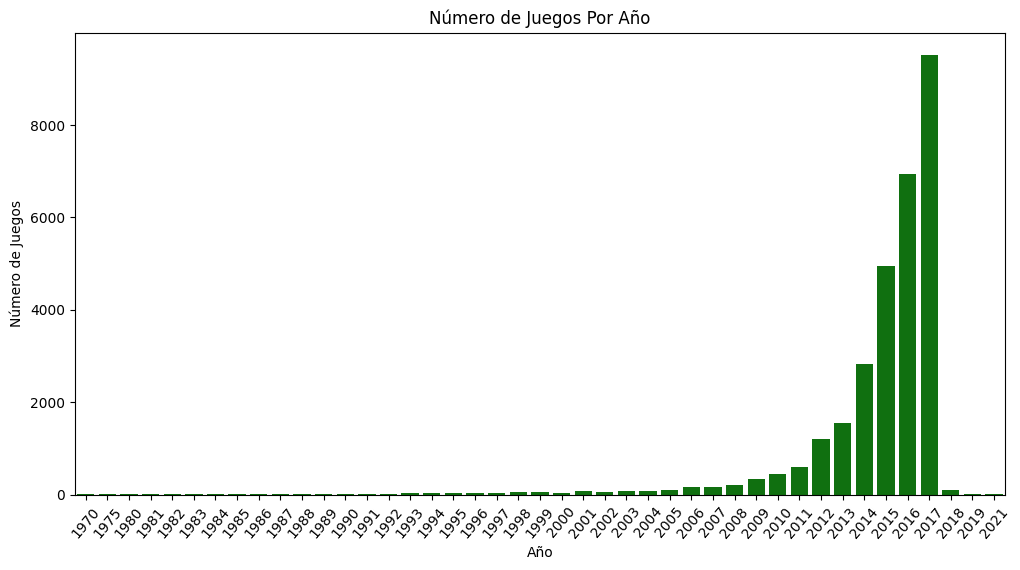

In [35]:
games_per_year = dframe['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=games_per_year.index, y=games_per_year.values, color='g')
plt.xticks(rotation=50)

plt.xlabel('Año')
plt.ylabel('Número de Juegos')
plt.title('Número de Juegos Por Año')

plt.show()

In [40]:
dframe_genres = df.explode('genres')
dframe_genres['precio'] = pd.to_numeric(dframe_genres['precio'], errors='coerce')
dframe_genres.dropna(subset=['precio'], inplace=True)
dframe_genres_ppromedio = dframe_genres.groupby('genres')['precio'].mean()


Gráfico de barras que muestra el precio promedio de los juegos para diferentes géneros: se observa que "Animation" y "Video Production" tienen los precios más caros.

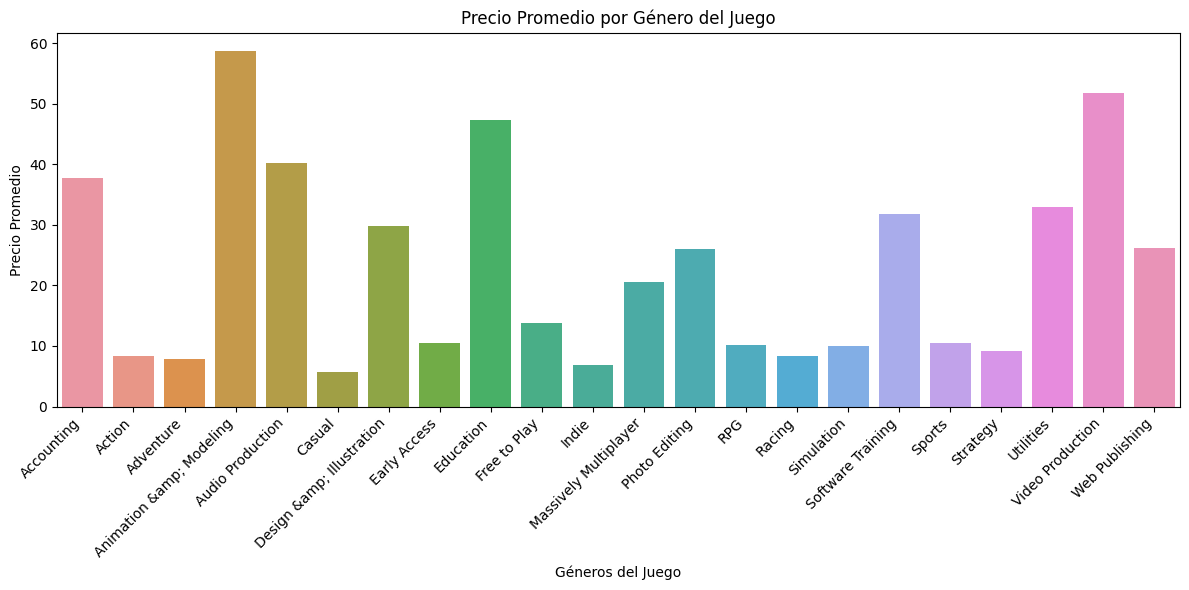

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x=dframe_genres_ppromedio.index, y=dframe_genres_ppromedio.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Géneros del Juego')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio por Género del Juego')
plt.tight_layout()
plt.show()

In [ ]:
print((dframe['precio'] > 10).sum())
print((dframe['precio'] > 80).sum())
print((dframe['precio'] > 200).sum())
print((dframe['precio'] > 400).sum())

6054
126
21
8


Evolución del Precio Promedio de los juegos:

In [42]:
df_anio = dframe.dropna(subset=['release_year', 'precio'])
df_anio = df_anio.loc[df_anio['release_year'] < 2018]

C:\Users\emily\AppData\Local\Temp\ipykernel_10304\580719050.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dframe_filtered = df_anio[(df_anio['release_year'] > 1999) & (dframe['precio'] < 80)]


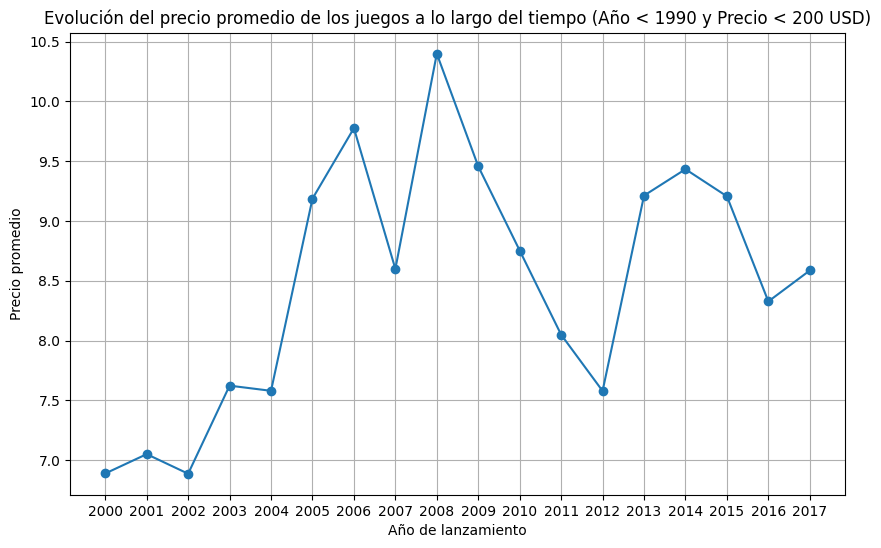

In [43]:
dframe_filtered = df_anio[(df_anio['release_year'] > 1999) & (dframe['precio'] < 80)]

# Agrupar los datos por el año de lanzamiento y calcular el precio promedio para cada año
precio_promedio_por_anio = dframe_filtered.groupby('release_year')['precio'].mean()

# Crear el gráfico de la evolución del precio promedio a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(precio_promedio_por_anio.index, precio_promedio_por_anio.values, marker='o', linestyle='-')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Precio promedio')
plt.title('Evolución del precio promedio de los juegos a lo largo del tiempo (Año < 1990 y Precio < 200 USD)')
plt.grid(True)
plt.xticks(range(int(dframe_filtered['release_year'].min()), int(dframe_filtered['release_year'].max()) + 1, 1))
plt.show()

Gráfico de barras que muestra la cantidad de juegos con cada clasificación: más de la mitad de los juegos están clasificados con "Positive" o una categoría más alta.

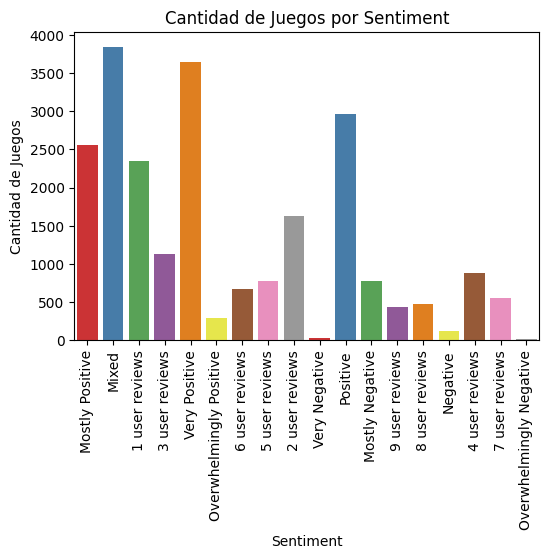

In [51]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dframe, x='sentiment', palette='Set1')

plt.xlabel('Sentiment')
plt.ylabel('Cantidad de Juegos')
plt.title('Cantidad de Juegos por Sentiment')
plt.xticks(rotation=90)

plt.show()

Gráfico de cajas que compara los precios de juegos con y sin acceso anticipado: la mediana del precio de los juegos sin Early Access es de alrededor de 15 y la mediana del precio de los juegos con Early Access es de alrededor de 25. Hay algunos valores atípicos en ambas categorías, siendo el precio más alto alrededor de 35 para los juegos con Early Access.

In [45]:
df_early = dframe[['precio', 'early_access']].copy()

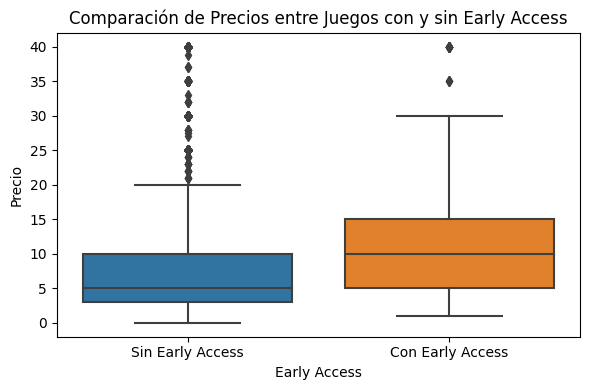

In [46]:
# Convertir la columna 'precio' a valores numéricos (cualquier valor no numérico se convertirá en NaN)
df_early['precio'] = pd.to_numeric(df_early['precio'], errors='coerce')

# Eliminar las filas con valores NaN en la columna 'precio'
df_early.dropna(subset=['precio'], inplace=True)

# Crear el gráfico de cajas (boxplot) para comparar los precios entre juegos con y sin acceso anticipado
plt.figure(figsize=(6, 4))
sns.boxplot(x='early_access', y='precio', data=df_early[df_early['precio'] < 40])

# Agregar etiquetas y títulos
plt.xlabel('Early Access')
plt.ylabel('Precio')
plt.title('Comparación de Precios entre Juegos con y sin Early Access')

# Agregar etiquetas para los valores en el eje X
plt.xticks(ticks=[0, 1], labels=['Sin Early Access', 'Con Early Access'])

plt.tight_layout()
plt.yticks(range(0, 41, 5))

# Mostrar el gráfico
plt.show()